<br>

<b><font size=22>Machine learning and statistical learning</font></b>
### (Error measure, Overfitting)

**<font color = red>NGUYEN Thi Huong</font>**

**<font color = red>MASTER 2 EBDS</font>**

## 1. Context and objectives

In this exercise, you will be asked to predict a continuous variable using a machine learning algorithm by varying the values of a hyperparameter of this algorithm. The objective is to observe the evolution of the measurement error on the training sample as well as on the test sample, according to the flexibility of the model.
The data used in this exercise give the selling price of cars (in rupees) and provide details on the caracteristics of the car. These were downloaded from Kaggle1 and cleaned (you can download the raw dataset on Kaggle and clean it yourself if you prefer).
The columns of the dataset are the following:

* name: name of the car

* year: year in which the car was bought

* selling_price: price the owner wants to sell the car at (in thousand rupees) * km_driven: distance completed by the car in km

* fuel: fuel type of the car

* seller_type: tells if car is sold by individual or dealer

* transmission: Gear transmission of the car (Automatic/Manual)

* owner: number of previous owners

* mileage: mileage of the car

* engine: engine capacity of the car

* max_power: max power of engine

* torque: torque of the car

* seats: number of seats in the car

* sample: whether the observation belongs to the training or testing set

## 2. First steps: preparing the data
**1. From AMeTICE, download the cars dataset (cars.csv).**

**2. Load the CSV file into R or Python.**

**3. Randomly split your dataset into two parts:**

a) a train set that will contain 80% of the observations

b) a test set that will contain the remaining 20%.

**4. From the train set, create two datasets:**

• a training set that will contain 80% of the observations from the train set

• a validation set that waill contain the remining 20%.

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

In [2]:
# I have public the data into a github link for all users can use this data without downloading.
link_file = "https://raw.githubusercontent.com/lilyhuong/Machine-learning-statistics/master/cars.csv"
df = pd.read_csv(link_file, index_col = 0)

In [3]:
df

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
name,,,,,,,,,,,
Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74.00,5.0
Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,5.0
Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78.00,5.0
Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90.00,5.0
Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.20,5.0
...,...,...,...,...,...,...,...,...,...,...,...
Hyundai i20 Magna,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.50,1197.0,82.85,5.0
Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.80,1493.0,110.00,5.0
Maruti Swift Dzire ZDi,2009,382000,120000,Diesel,Individual,Manual,First Owner,19.30,1248.0,73.90,5.0


In [4]:
df.dtypes

year               int64
selling_price      int64
km_driven          int64
fuel              object
seller_type       object
transmission      object
owner             object
mileage          float64
engine           float64
max_power        float64
seats            float64
dtype: object

Firstly, we can see that in this dataframe, we have 2 types of variables: integer and string. Because Python can not handle on charater variable, so we convert this variale into numerical variable(it's better with one hot coding, however, with this exercise, I just convert to int type). In this exercise, we need only 3 explantory variables: fuel, year, km driven, only "fuel" variable need to be converted to numericial type by using cat.codes

In [5]:
df.fuel = pd.Categorical(df.fuel)
df['fuel_num'] = df.fuel.cat.codes

The data is present of outliers in km_driven(see from statistic summary table). Therefore, to be better in using Support vector Machine, I will use scaling fearture to map the value into the same range. It will spend less time for fitting SVM model.

In [6]:
min_max = MinMaxScaler()
#df["km_driven"] = min_max.fit_transform(df[["km_driven"]].values.reshape(-1, 1))
#df["fuel_num"] = min_max.fit_transform(df[["fuel_num"]].values.reshape(-1, 1))
#df["year"] = min_max.fit_transform(df[["year"]].values.reshape(-1, 1))
#df["selling_price"] = min_max.fit_transform(df[["selling_price"]].values.reshape(-1, 1))
liste = ["km_driven", "fuel_num", "year", "selling_price"]
for i in liste:
    df[i] = min_max.fit_transform(df[[i]].values.reshape(-1, 1))

In [7]:
y = df.selling_price   
X = df[["year", "fuel_num", "km_driven"]]

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [9]:
X_train_val, X_val, y_train_val, y_val = train_test_split(X_train, y_train, test_size = 0.2, random_state = 42)

## 3 Getting to know the data: descriptive statistics

#### 1. Compute some summary statistics for the whole dataset (and comment the outputs):
**• for numerical variables: mean, minimum, maximum, quartiles**

**• for categorical variables: for each category: proportion of observations; mean, minimum, maximum, quartiles of the target variable (selling_price)**


In [10]:
# Here we get all descriptive statistics for 4 variables: year, km_driven, fuel_num and selling_price
df.describe()

,year,selling_price,km_driven,mileage,engine,max_power,seats,fuel_num
count,8128.000000,8128.000000,8128.000000,8128.000000,7907.000000,7912.000000,7907.000000,8128.000000
mean,0.832541,0.061010,0.029578,18.802005,1458.625016,91.517919,5.416719,0.630372
std,0.109304,0.080868,0.023957,5.165302,503.916303,35.822499,0.959588,0.334104
min,0.000000,0.000000,0.000000,-1.000000,624.000000,0.000000,2.000000,0.000000
25%,0.756757,0.022568,0.014827,16.251852,1197.000000,68.050000,5.000000,0.333333
50%,0.864865,0.042126,0.025418,19.100000,1248.000000,82.000000,5.000000,0.333333
75%,0.918919,0.064694,0.041517,22.070000,1582.000000,102.000000,5.000000,1.000000
max,1.000000,1.000000,1.000000,42.000000,3604.000000,400.000000,14.000000,1.000000


In [11]:
len(df[df.year <= 1991])

8128

In [12]:
df.fuel_num.value_counts(normalize=True)

0.333333    0.541585
1.000000    0.446727
0.000000    0.007013
0.666667    0.004675
Name: fuel_num, dtype: float64

In [13]:
df.fuel.unique()

['Diesel', 'Petrol', 'LPG', 'CNG']
Categories (4, object): ['CNG', 'Diesel', 'LPG', 'Petrol']

For this exercise, the data was first considered for only 4 variables. The origine data shows that we have 8128 observations. However we can see the presence of missing values in engie, max_power and seats. A relevant aspect to mention is that in the original database once we generate this variable, we found that there were some cases for which this variable was extremely high(small) (outliers): for example, "km_driven" and "year" with only 2 values . Furthurmore, look at the fuel variable, about 99% of people prefer using petrol(54,15% equals to 4402 indivisuals) and next is Dielsel with 44,67%. Therefore this data present of imbalance in feature, this issue can be addressed by imposing a proportional weight loss during model fitting.

In [14]:
df.describe(include = "all")

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,fuel_num
count,8128.000000,8128.000000,8128.000000,8128,8128,8128,8128,8128.000000,7907.000000,7912.000000,7907.000000,8128.000000
unique,NaN,NaN,NaN,4,3,2,5,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,Diesel,Individual,Manual,First Owner,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,4402,6766,7078,5289,NaN,NaN,NaN,NaN,NaN
mean,0.832541,0.061010,0.029578,NaN,NaN,NaN,NaN,18.802005,1458.625016,91.517919,5.416719,0.630372
std,0.109304,0.080868,0.023957,NaN,NaN,NaN,NaN,5.165302,503.916303,35.822499,0.959588,0.334104
min,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,-1.000000,624.000000,0.000000,2.000000,0.000000
25%,0.756757,0.022568,0.014827,NaN,NaN,NaN,NaN,16.251852,1197.000000,68.050000,5.000000,0.333333
50%,0.864865,0.042126,0.025418,NaN,NaN,NaN,NaN,19.100000,1248.000000,82.000000,5.000000,0.333333
75%,0.918919,0.064694,0.041517,NaN,NaN,NaN,NaN,22.070000,1582.000000,102.000000,5.000000,1.000000


#### 2. Create graphs to show the relationship between the target variable and the explanatory variables. Comment on these.

Text(0, 0.5, 'Selling price')

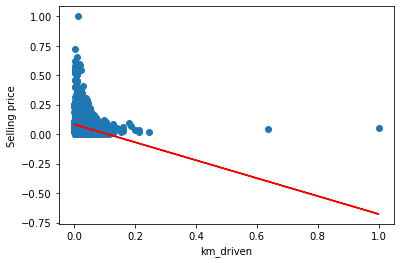

In [15]:
X = df.km_driven
#create basic scatterplot
plt.plot(X, y, 'o')

#obtain m (slope) and b(intercept) of linear regression line
m, b = np.polyfit(X, y, 1)

#add linear regression line to scatterplot 
plt.plot(X, m * X + b, color = "red")
plt.xlabel("km_driven")
plt.ylabel("Selling price")

This graph illustrate a strong negative correlation between the selling price of a motor and number of Kilometres the car is driven

Text(0, 0.5, 'Selling price')

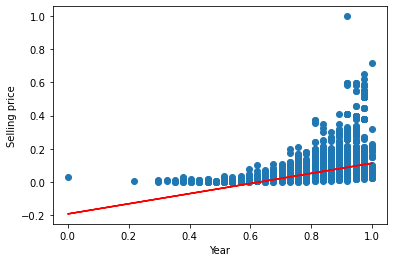

In [16]:
X = df.year
#create basic scatterplot
plt.plot(X, y, 'o')

#obtain m (slope) and b(intercept) of linear regression line
m, b = np.polyfit(X, y, 1)

#add linear regression line to scatterplot 
plt.plot(X , m * X + b, color = "red")
plt.xlabel("Year")
plt.ylabel("Selling price")

The correlation between two variables is positive. We can simplify why car pricing are rasing overyear : high demand and limited supplies, inflation is another factor of increasing in price. 

Text(0, 0.5, 'Selling price')

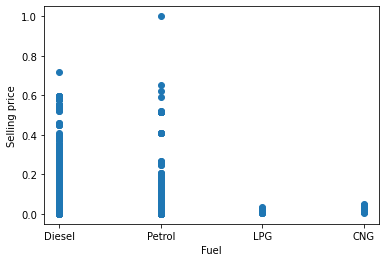

In [17]:
X = df.fuel
#create basic scatterplot
plt.plot(X, y, 'o')
plt.xlabel("Fuel")
plt.ylabel("Selling price")

As I had explainded in summary statistics, we can see implanced data in feature by this graph

Another relevant point that may affect classification performance is the correlation between features: the presence of highly correlated features may lead to a decrease in the performance of some classification algorithms that assume that the predictors are all independent. In another way, I will show these correlation between features and the depedent variable by Peason's correlation

/var/folders/q2/tks8t2v53c95y3jqch98mqrc0000gn/T/ipykernel_55620/2338550395.py:5: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.triu(np.ones_like(corr, dtype=np.bool))


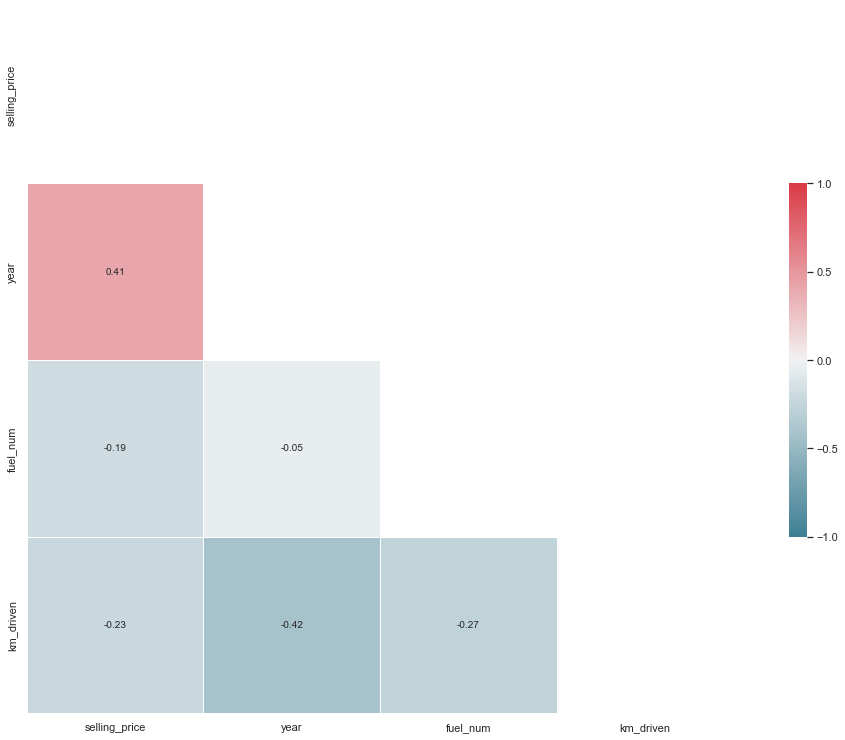

In [18]:
sns.set(style="white", font_scale=1)
numeric = ["selling_price", "year", "fuel_num", "km_driven" ]
corr = df[numeric].corr()

mask = np.triu(np.ones_like(corr, dtype=np.bool))
f, ax = plt.subplots(figsize=(20, 13))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
ax=sns.heatmap(corr, mask=mask, vmax=1, vmin=-1, center=0,
            square=True, linewidths=.5, cmap=cmap, cbar_kws={"shrink": .5}, annot=True, annot_kws={"size": 10})
cbar=ax.collections[0].colorbar
cbar.set_ticks([-1, -0.50, 0, 0.50, 1])
plt.savefig('Fig - Correlation matrix by means of the Pearson’s coefficient for all feature pairs.png')

## 4.  Estimations
**You will train two different models: a random forest and a SVM. You will understand in more
details how both algorithm work in the subsequent lessons. For now, all you need to understand
is that you can vary some hyperparameters for both models.**

**Among the different values that you will try for these hyperparameters, you need to select which provides the best fit, on the
validation set.**

**Using a random forest algorithm, predict the selling price of the car in the training set.**

**Use the following variables: year, fuel, km_driven.**

**If you use R, you can use the randomForest function from { randomForest }. If you use
Python, you can use the RandomForestRegressor function from sklearn.ensemble. You
will use the following hyperparameters for the algorithm:**

In [19]:
df

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,fuel_num
name,,,,,,,,,,,,
Maruti Swift Dzire VDI,0.837838,0.042126,0.061640,Diesel,Individual,Manual,First Owner,23.40,1248.0,74.00,5.0,0.333333
Skoda Rapid 1.5 TDI Ambition,0.837838,0.034102,0.050837,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,5.0,0.333333
Honda City 2017-2020 EXi,0.621622,0.012839,0.059310,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78.00,5.0,1.000000
Hyundai i20 Sportz Diesel,0.729730,0.019559,0.053803,Diesel,Individual,Manual,First Owner,23.00,1396.0,90.00,5.0,0.333333
Maruti Swift VXI BSIII,0.648649,0.010030,0.050837,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.20,5.0,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
Hyundai i20 Magna,0.810811,0.029087,0.046601,Petrol,Individual,Manual,First Owner,18.50,1197.0,82.85,5.0,1.000000
Hyundai Verna CRDi SX,0.648649,0.010532,0.050414,Diesel,Individual,Manual,Fourth & Above Owner,16.80,1493.0,110.00,5.0,0.333333
Maruti Swift Dzire ZDi,0.702703,0.035306,0.050837,Diesel,Individual,Manual,First Owner,19.30,1248.0,73.90,5.0,0.333333


The objective of this exercise is how to observe the evolution of the measurement error by calculating the means square error MSE. Then, for each method, I will create a function called MSE** with parameter(hyperparameter):

* max_features will set up by default value 3

* n_estimateurs: default value by 20

* min_samples_leaf: default value by 10

This function have using `` RandomForestRegressor `` and ``mean_squared_error `` from sklearn. It depents on what is the usage for question, we can choose predecting value and/ or calculating MSE

In [20]:
def MSE_RandomForestR(Xtrain, ytrain, Xtest, ytest, **params):
    max_features = params.get("max_features", 3)
    n_estimators = params.get("n_estimators", 20)
    min_samples_leaf = params.get("min_samples_leaf", 10)
    Prediction = params.get("Prediction", False)
    MSE = params.get("MSE", False)
    global mse
    #create a model
    regr = RandomForestRegressor(max_features =  max_features,  n_estimators = n_estimators, min_samples_leaf = min_samples_leaf, random_state= 42)
    regr.fit(Xtrain, ytrain)
    prediction = regr.predict(Xtest)
    mse = mean_squared_error(ytest, prediction)
    if(Prediction):
        print("Predict the selling price of the car in the data set: {} ".format(prediction))
    if (MSE):
        print("The mean squared error: " , mse)


In [21]:
MSE_RandomForestR(X_train_val, y_train_val, X_train_val, y_train_val, Prediction = True)

Predict the selling price of the car in the data set: [0.01717115 0.01959951 0.33266832 ... 0.2611999  0.05110222 0.00878122] 


### 2. Compute the mean squared error both for the training and the validation datasets. Compare them with each other.

For training set

In [22]:
MSE_RandomForestR(X_train_val, y_train_val, X_train_val, y_train_val, MSE = True)

The mean squared error:  0.0021319577019993405


For Validation set

In [23]:
MSE_RandomForestR(X_train_val, y_train_val, X_val, y_val, MSE = True)

The mean squared error:  0.0029681897794714474


In this case, MSE in training set is smaller than validation set. So it means the model present of overfitting. However, 
To get a better machine learning-based model, MSE of training and testing (predictions)(in this exercise is validation set) should be similar. In other words, the difference in MSE obtained during model training and  should validation be relatively small in validation data set. Therefore, we will move on next part. 

### 3. Now, using a loop, make the minimum size of terminal nodes vary as follows: 10, 20,30, . . . , 100. At each iteration, compute the mean squared error (and store it) for both samples.

In [24]:
#For training set 
list_MSE_train = []
for i in range(10,101, 10):
      MSE_RandomForestR(X_train_val, y_train_val, X_train_val, y_train_val, min_samples_leaf = i )  
      list_MSE_train.append(mse)
      print("With minimum {} terminal node, the mean squared error is {}".format(i, mse))
    

With minimum 10 terminal node, the mean squared error is 0.0021319577019993405
With minimum 20 terminal node, the mean squared error is 0.002424039748717204
With minimum 30 terminal node, the mean squared error is 0.002803839333964384
With minimum 40 terminal node, the mean squared error is 0.0029855065976825503
With minimum 50 terminal node, the mean squared error is 0.0032385438075597218
With minimum 60 terminal node, the mean squared error is 0.003406066942978413
With minimum 70 terminal node, the mean squared error is 0.0035058288827800694
With minimum 80 terminal node, the mean squared error is 0.0036939668889803177
With minimum 90 terminal node, the mean squared error is 0.003759051984550525
With minimum 100 terminal node, the mean squared error is 0.00377823191742963


In [25]:
list_MSE_val = []
for i in range(10,101, 10):
      MSE_RandomForestR(X_train_val, y_train_val, X_val, y_val, min_samples_leaf = i )  
      list_MSE_val.append(mse)
      print("With minimum {} terminal node, the mean squared error is {}".format(i, mse))

With minimum 10 terminal node, the mean squared error is 0.0029681897794714474
With minimum 20 terminal node, the mean squared error is 0.0030540255390656655
With minimum 30 terminal node, the mean squared error is 0.00338125466288152
With minimum 40 terminal node, the mean squared error is 0.0035626876620239475
With minimum 50 terminal node, the mean squared error is 0.003752803418157476
With minimum 60 terminal node, the mean squared error is 0.0039822713266138695
With minimum 70 terminal node, the mean squared error is 0.004087440646532878
With minimum 80 terminal node, the mean squared error is 0.0041915140065717825
With minimum 90 terminal node, the mean squared error is 0.0042294006646237114
With minimum 100 terminal node, the mean squared error is 0.004243747195415733


### 4. On a graph, plot the mean squared error as a function of the node size, for both samples (one curve for each sample). Comment.

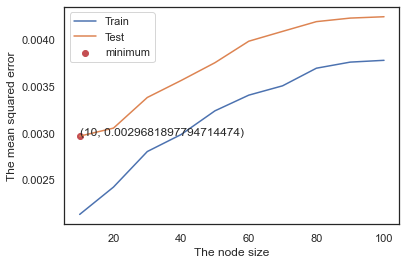

In [26]:
x = np.array(list(range(10, 101, 10)))
y = np.array(list_MSE_train)
yval = np.array(list_MSE_val)
x_min = np.argmin(list_MSE_val) + 10
min_test = np.min(list_MSE_val)
plt.plot(x, y)
plt.plot(x, yval)
plt.scatter(x_min, min_test, c = 'r', label = 'minimum')
plt.text(x_min, min_test, '({}, {})'.format(x_min, min_test))
plt.legend(["Train", "Test", 'minimum'])
plt.xlabel("The node size")
plt.ylabel("The mean squared error")
plt.show()

From this graphic, MSE in test set is always higher than training set, there this model present of overfitting. It can be seen in this graphic that the training MSE (given by the blue curve) increases sharply as the flexibility of the model increases. Furthurmore, when we plot the test MSE (given by the orange curve) the situation is not far from training curve. The test MSE initially increase sligtly as we increase the flexibility of the model but eventually starts to increase again after we introduce a lot of flexibility. As flexibility is increased in the first part between 10 and 20 node size, the bias will tend to drop (faster than the variance can increase) and so we see an increasing insignificantly in test MSE between 10 and 20 node size (compare with the second part: from 20 to 100 node size). 

### 5. What are the values for your hyperparameters (the number of trees, the number of variables randomly sampled as candidates at each split, and the minimum size of terminal nodes) that provide the best fit with regard to the MSE?

In [27]:
print (" If the node size vary between 10 and 100, I will chose the coordinate of {} node size and MSE  = {} will present the best selection for this model with regard to MSE".format (x_min, min_test))

 If the node size vary between 10 and 100, I will chose the coordinate of 10 node size and MSE  = 0.0029681897794714474 will present the best selection for this model with regard to MSE


In this question, we can see the difference between MSE from training set and validation set, it presents of overfitting. I will reduce the complexity of model by decreasing the number of max_features and the node size. To show that, I will test the choice for hyperparameters by difference value of trees, number of variables for each split and the minimum size of terminode to see the effect of reducing the complexity of model 

In [28]:
df2 = pd.DataFrame(columns= ["max_feature", "n_estimators","min_samples_leaf" , "MSE_train", "MSE_test"])
for i in range(1,4):
    for n in range(10, 200, 10):
        for leaf in range(2, 10, 2):
            regr = RandomForestRegressor(max_features= i, n_estimators = n, min_samples_leaf = leaf)
            regr.fit(X_train_val, y_train_val)
            #for train sample
            prediction_random1 = regr.predict(X_train_val)
            mse_train = mean_squared_error(y_train_val, prediction_random1 )
            #for valid sample 
            prediction_random = regr.predict(X_val)
            mse = mean_squared_error(y_val, prediction_random )
            new_row = pd.Series({"max_feature": i, "n_estimators": n,"min_samples_leaf": leaf , "MSE_train":mse_train, "MSE_test":mse})
            df2 = pd.concat([df2, new_row.to_frame().T], ignore_index= True)   

In [29]:
df2

,max_feature,n_estimators,min_samples_leaf,MSE_train,MSE_test
0,1.0,10.0,2.0,0.001693,0.002784
1,1.0,10.0,4.0,0.002022,0.002689
2,1.0,10.0,6.0,0.002277,0.002843
3,1.0,10.0,8.0,0.002465,0.002932
4,1.0,20.0,2.0,0.001671,0.002654
...,...,...,...,...,...
223,3.0,180.0,8.0,0.00201,0.003011
224,3.0,190.0,2.0,0.001647,0.002913
225,3.0,190.0,4.0,0.001843,0.002977
226,3.0,190.0,6.0,0.001931,0.003003


In [30]:
df2["MSE_test"] = df2["MSE_test"].astype(str).astype(float)

In [31]:
df3 = df2.loc[df2["MSE_test"].idxmin()]
df3

max_feature              1.0
n_estimators            40.0
min_samples_leaf         2.0
MSE_train           0.001681
MSE_test            0.002556
Name: 12, dtype: object

In [32]:
print ("With {} variables randomly sampled as candidates at each split, {} trees, and minimum {} terminal node will be the best selection for this model with regard to MSE".format (df3[0], df3[1], df3[2]))

With 1.0 variables randomly sampled as candidates at each split, 40.0 trees, and minimum 2.0 terminal node will be the best selection for this model with regard to MSE


Note: Without checking MSE, we can find the best parameters (hyberparameter) by looking Grid Search

In [33]:
# Number of trees in random forest
n_estimators = [int(i) for i in np.linspace(start = 10, stop = 500, num = 200)]
#Number of features to consider at every split
max_feature = list(range(1,4))
leaf = list(range(2, 30 , 2))

In [34]:
# Create the random grid
from sklearn.model_selection import RandomizedSearchCV
random_grid = {'n_estimators': n_estimators,
               'max_features': max_feature,
               'min_samples_leaf': leaf}
regr = RandomForestRegressor()
rf_random = RandomizedSearchCV(estimator = regr, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
rf_random.fit(X_train_val, y_train_val)

Fitting 3 folds for each of 100 candidates, totalling 300 fits
[CV] END max_features=1, min_samples_leaf=2, n_estimators=91; total time=   0.5s
[CV] END max_features=1, min_samples_leaf=2, n_estimators=91; total time=   0.5s
[CV] END max_features=1, min_samples_leaf=2, n_estimators=91; total time=   0.5s
[CV] END max_features=2, min_samples_leaf=26, n_estimators=209; total time=   1.0s
[CV] END max_features=2, min_samples_leaf=26, n_estimators=209; total time=   1.1s
[CV] END max_features=2, min_samples_leaf=26, n_estimators=209; total time=   1.1s
[CV] END max_features=2, min_samples_leaf=22, n_estimators=285; total time=   1.4s
[CV] END max_features=2, min_samples_leaf=22, n_estimators=285; total time=   1.4s
[CV] END max_features=2, min_samples_leaf=22, n_estimators=285; total time=   1.3s
[CV] END max_features=2, min_samples_leaf=28, n_estimators=91; total time=   0.4s
[CV] END max_features=2, min_samples_leaf=6, n_estimators=251; total time=   1.4s
[CV] END max_features=2, min_sam

RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'max_features': [1, 2, 3],
                                        'min_samples_leaf': [2, 4, 6, 8, 10, 12,
                                                             14, 16, 18, 20, 22,
                                                             24, 26, 28],
                                        'n_estimators': [10, 12, 14, 17, 19, 22,
                                                         24, 27, 29, 32, 34, 37,
                                                         39, 42, 44, 46, 49, 51,
                                                         54, 56, 59, 61, 64, 66,
                                                         69, 71, 74, 76, 78, 81, ...]},
                   random_state=42, verbose=2)

In [35]:
rf_random.best_params_

{'n_estimators': 91, 'min_samples_leaf': 2, 'max_features': 1}

## 4.2 A second model: SVM

Now you will train another machine learning model: a support vector machine. You will only
consider a linear kernel, and make only one hyperparameter vary (called the cost parameter;
low values for this hyperparameter lead to a smoother decision surface)

### 1. Using a Support Vector Machine (SVM) with a linear kernel, predict the selling price of the car in the training set. 

Use the following variables: year, fuel, km_driven.

The objective of this exercise is how to observe the evolution of the measurement error by calculating the means square error MSE. Then, for each method, I will create a function called MSE** with parameter(hyperparameter):

* ``kernel `` will set up by default ``linear``

* ``C``: Regularization parameter, default value by 10

This function have using `` SVM.SVC`` and ``mean_squared_error `` from sklearn. It depents on what is the usage for question, we can choose predecting value and/ or calculating MSE

In [36]:
def MSE_SVM(Xtrain, ytrain, Xtest, ytest, **params):
    kernel = params.get("kernel", "linear")
    C = params.get("C", 10)
    Prediction = params.get("Prediction", False)
    MSE = params.get("MSE", False)
    global mse

    #create a model
    svc = SVR(kernel = kernel, C = C)
    svc.fit(Xtrain, ytrain)
    prediction = svc.predict(Xtest)
    mse = mean_squared_error(ytest, prediction)
    if(Prediction):
        print("Predict the selling price of the car in the data set: {} ".format(prediction))
    if (MSE):
        print("The mean squared error: " , mse)

In [37]:
MSE_SVM(X_train_val, y_train_val, X_train_val, y_train_val, Prediction = True)

Predict the selling price of the car in the data set: [ 0.02777413  0.04177984  0.17614979 ...  0.16030491  0.11249497
 -0.02031476] 


### 2. Compute the mean squared error both for the training and the validation datasets. Compare them with each other.

In [38]:
# Training dataset
MSE_SVM(X_train_val, y_train_val, X_train_val, y_train_val, MSE = True)

The mean squared error:  0.00683191410134645


In [39]:
#Validation dataset
MSE_SVM(X_train_val, y_train_val, X_val, y_val, MSE = True)

The mean squared error:  0.006653980520520459


In this case, MSE in training set is smaller than validation set. So it means the model present of overfitting.

### 3. Now, using a loop, make the cost vary:

a) with R: 10ˆseq(3, -2, length = 50)

b) with python: 10**np.linspace(start=3, stop=-2, num=50)

At each iteration, compute the mean squared error (and store it) for both samples.

In [40]:
#because the time for fit the model is a bit long, I dont want to re-use this function 2 times for trainning and validation datat set
#therefore I will apply directly  fitted model on 2 samples 
list_MSE_train_svm = []
list_MSE_val_svm = []
for i in (10**np.linspace(start=3, stop=-2, num=50)):
    #create a model 
    svc = SVR(kernel = "linear", C = i)
    #train model
    svc.fit(X_train_val, y_train_val)
    #predict value for train set
    prediction_train_svm = svc.predict(X_train_val)
    #calculate MSE
    mse_train_svm = mean_squared_error(y_train_val, prediction_train_svm)
    list_MSE_train_svm.append(mse_train_svm)
    print("In Training dataset, with {} value of cost, the mean squared error is {}".format(i, mse_train_svm))

    prediction_val_svm = svc.predict(X_val)
    #calculate MSE
    mse_val_svm = mean_squared_error(y_val, prediction_val_svm)
    list_MSE_val_svm.append(mse_val_svm)
    print("In validation dataset, with {} value of cost, the mean squared error is {}".format(i, mse_val_svm))

In Training dataset, with 1000.0 value of cost, the mean squared error is 0.00680624167179646
In validation dataset, with 1000.0 value of cost, the mean squared error is 0.006622399922143883
In Training dataset, with 790.6043210907702 value of cost, the mean squared error is 0.006838085065779199
In validation dataset, with 790.6043210907702 value of cost, the mean squared error is 0.006659452114489921
In Training dataset, with 625.0551925273976 value of cost, the mean squared error is 0.006829731894432288
In validation dataset, with 625.0551925273976 value of cost, the mean squared error is 0.00664889340329408
In Training dataset, with 494.1713361323833 value of cost, the mean squared error is 0.006817540499414355
In validation dataset, with 494.1713361323833 value of cost, the mean squared error is 0.006638355926782362
In Training dataset, with 390.6939937054617 value of cost, the mean squared error is 0.006816491209355613
In validation dataset, with 390.6939937054617 value of cost, t

### 4. On a graph, plot the mean squared error as a function of the node size, for both samples (one curve for each sample). Comment.

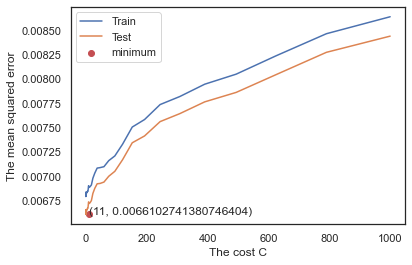

In [41]:
x = np.array(sorted(list(10**np.linspace(start=3, stop=-2, num=50))))
y = np.array(list_MSE_train_svm)
yval = np.array(list_MSE_val_svm)
x_min = np.argmin(list_MSE_val_svm) 
min_test = np.min(list_MSE_val_svm)
plt.plot(x, y)
plt.plot(x, yval)
plt.scatter(x_min, min_test,c = 'r', label = 'minimum')
plt.text(x_min , min_test, '({}, {})'.format(x_min, min_test))
plt.legend(["Train", "Test", 'minimum'])
plt.xlabel("The cost C")
plt.ylabel("The mean squared error")
plt.show()

This graph illustrates that MSE in Test set is always smaller than training dataset, therefore it is underfitting model 

### 5. What is the value for your hyperparameter ? 

In [42]:
print (" If the cost value C vary between 0.01 and 1000, I will chose the coordinate of {} value of cost C and MSE  = {} will present the best selection for this model with regard to MSE".format (x_min, min_test))

 If the cost value C vary between 0.01 and 1000, I will chose the coordinate of 11 value of cost C and MSE  = 0.0066102741380746404 will present the best selection for this model with regard to MSE


In [43]:
list_MSE_train_svm = []
list_MSE_val_svm = []
df4 = pd.DataFrame(columns= ["kernel", "C", "MSE_test"])
for i in (10**np.linspace(start=2, stop=-2, num= 20)):
    for j in ["linear", "poly", 'rbf', 'sigmoid']:
        MSE_SVM(X_train_val, y_train_val, X_val, y_val, C = i, kernel = j)
        new_row = pd.Series({"kernel": j, "C": i, "MSE_test":mse})
        df4 = pd.concat([df4, new_row.to_frame().T], ignore_index= True)  

In [44]:
df4

,kernel,C,MSE_test
0,linear,100.0,0.006629
1,poly,100.0,0.00615
2,rbf,100.0,0.006801
3,sigmoid,100.0,16760664.77589
4,linear,61.584821,0.006622
...,...,...,...
75,sigmoid,0.016238,0.457698
76,linear,0.01,0.00844
77,poly,0.01,0.006861
78,rbf,0.01,0.008382


In [45]:
df4["MSE_test"] = df4["MSE_test"].astype(str).astype(float)
df5 = df4.loc[df4["MSE_test"].idxmin()]
df5

kernel           poly
C           61.584821
MSE_test     0.006068
Name: 5, dtype: object

After changing the kernel, we can see that Polynomial kernels give better result for problems because all the training data is normalized. 


## 4.3 Select your model
Now that you have selected, both for the random forest and for the SVM the values of the
hyperparameters that produce the best fits on the validation set, you can select the model that
gives the best results on the test set.

### 1. Compute the MSE on the test set for the random forest with the selected values for the hyperparameters.

In [46]:
MSE_RandomForestR(X_train_val, y_train_val, X_test, y_test, MSE = True, max_features = df3[0], n_estimators = int(df3[1]), min_samples_leaf = int(df3[2]))

The mean squared error:  0.002502722920601099


### 2. Do the same for your best SVM.

In [47]:
MSE_SVM(X_train_val, y_train_val, X_test, y_test, kernel = df5[0], C = df5[1] , MSE = True)

The mean squared error:  0.006271552620974862


### 3. Which model gives the best results on the test set? Comment.

From Validation datatset, MSE in SVM is higher than MSE random forest so I will choose random forest model 